In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import src.data_handler as data_handler
import src.models as models
import os
from IPython.display import display

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
np.random.seed(42)

In [2]:
clustering_df : pd.DataFrame = pd.read_csv(f"{project_root}/TP04/data/raw/clustering.csv").drop(columns=['index'])
clustering_df.info()
clustering_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       4999 non-null   int64
 1   B       4999 non-null   int64
dtypes: int64(2)
memory usage: 78.2 KB


,A,B
0,812954,643720
1,868217,609046
2,920248,607272
3,841621,639394
4,843907,598777


In [3]:
# clustering_normalized_df : pd.DataFrame = clustering_df / clustering_df.max()
# clustering_normalized_df.info()
# clustering_normalized_df.head()
# clustering_normalized_df.to_csv(f"{project_root}/TP04/data/processed/clustering_normalized.csv")

In [4]:
X : np.ndarray = clustering_df.to_numpy()
k_means_01 : models.KMeans = models.KMeans(X, 9)
k_means_01.fit_centroids(print_iterations=True, runs=20)
print("")
print("CENTROIDES")
for c, i in zip(k_means_01.mu, range(1, len(k_means_01.mu) + 1)):
    print(f"Cluster = {i:02d} | A: {c[0]}, B: {c[1]}")

done at iteration  18
done at iteration  24
done at iteration  33
done at iteration  20
done at iteration  19
done at iteration  51
done at iteration  31
done at iteration  12
done at iteration  24
done at iteration  25
done at iteration  25
done at iteration  14
done at iteration  17
done at iteration  35
done at iteration  12
done at iteration  13
done at iteration  14
done at iteration  26
done at iteration  11
done at iteration  22

CENTROIDES
Cluster = 01 | A: 349201, B: 683524
Cluster = 02 | A: 458938, B: 199113
Cluster = 03 | A: 208179, B: 474552
Cluster = 04 | A: 734031, B: 196117
Cluster = 05 | A: 568850, B: 787475
Cluster = 06 | A: 156898, B: 236944
Cluster = 07 | A: 455542, B: 414652
Cluster = 08 | A: 736254, B: 491034
Cluster = 09 | A: 818761, B: 726042


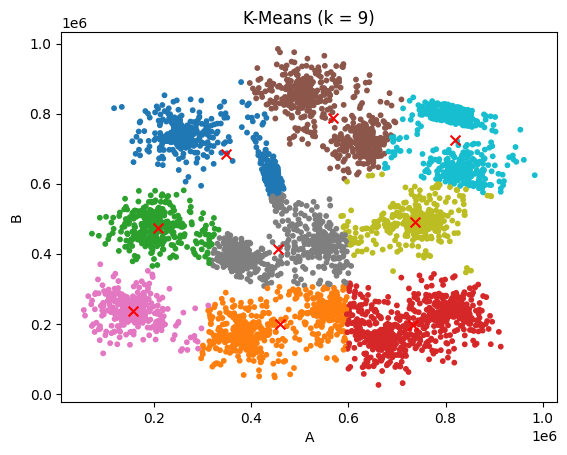

In [5]:
k_means_01.plot_clusters_2d()

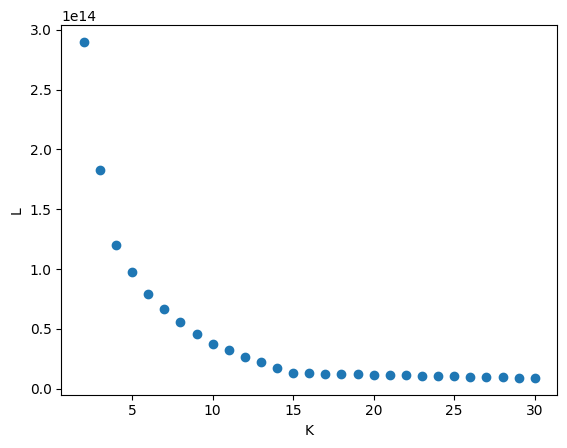

In [6]:
k_max : int = 30
k_model : models.KMeans
losses_k : list[float] = []
valores_k : list[int] = list(range(2, k_max+1))
for k in range(2, k_max + 1):
    k_model = models.KMeans(X, k)
    k_model.fit_centroids(runs=5)
    losses_k.append(k_model.calculate_distance_squared_error())
plt.scatter(range(2, k_max+1), losses_k)
plt.xlabel("K")
plt.ylabel("L")
plt.show()

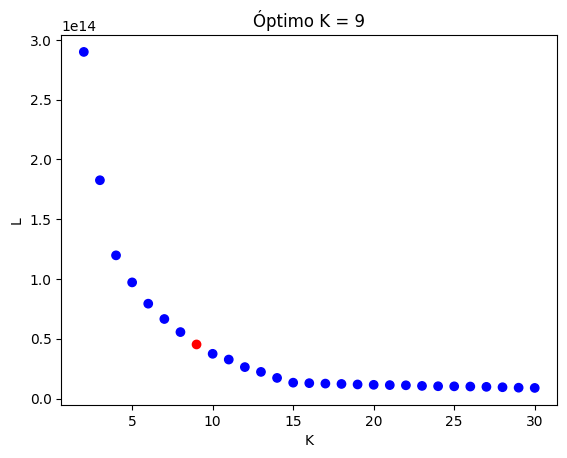

In [7]:
valores_k_np = np.array(valores_k)
losses_k_np = np.array(losses_k)

p1 = np.array([valores_k_np[0], losses_k_np[0]])
p2 = np.array([valores_k_np[-1], losses_k_np[-1]])
line_vec = p2 - p1
line_vec_norm = line_vec / np.linalg.norm(line_vec)

def distance_to_line(p):
    vec = p - p1
    proj = np.dot(vec, line_vec_norm) * line_vec_norm
    return np.linalg.norm(vec - proj)

distances = np.array([distance_to_line(np.array([valores_k_np[i], losses_k_np[i]])) for i in range(len(valores_k_np))])
k_opt = valores_k_np[np.argmax(distances)]

colors : list[float] = ['red' if k == k_opt else 'blue' for k in valores_k_np]

plt.scatter(valores_k_np, losses_k_np, c=colors)
plt.xlabel("K")
plt.ylabel("L")
plt.title(f"Óptimo K = {k_opt}")
plt.show()


In [8]:
X: np.ndarray = clustering_df.to_numpy()
gmm_model = models.GMM(X, 15)
mu, cov, coef = gmm_model.fit_gaussians(runs=20)
print("\nCENTROIDES")
for c, i in zip(mu, range(1, len(mu) + 1)):
    print(f"Cluster = {i:02d} | A: {c[0]}, B: {c[1]}")


CENTROIDES
Cluster = 01 | A: 151879, B: 239274
Cluster = 02 | A: 806344, B: 574553
Cluster = 03 | A: 564088, B: 793352
Cluster = 04 | A: 531899, B: 444247
Cluster = 05 | A: 382248, B: 170990
Cluster = 06 | A: 743224, B: 193253
Cluster = 07 | A: 786463, B: 564285
Cluster = 08 | A: 560431, B: 241041
Cluster = 09 | A: 256738, B: 739001
Cluster = 10 | A: 639512, B: 715542
Cluster = 11 | A: 199846, B: 477934
Cluster = 12 | A: 590063, B: 445683
Cluster = 13 | A: 368024, B: 393027
Cluster = 14 | A: 444212, B: 611631
Cluster = 15 | A: 809732, B: 798584


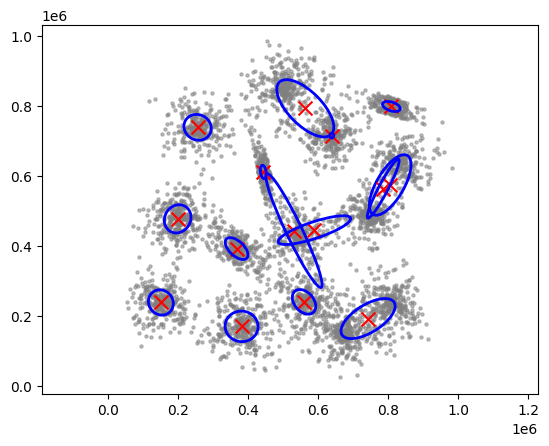

In [9]:
gmm_model.plot_gmm()